### Language detection based on N-gram-based text categorization method described in the Cavnar & Trenkle paper(1994)

Wili 2018 dataset is used for implementing this algorithm. The dataset contains sentences in 200+ languages.

- `N` is the number of top n-grams to keep in each profile (as in the paper, 300).
- `NGRAM_LOWER` and `NGRAM_UPPER` define the range of n-gram sizes (here, 1 to 3 for speed).

In [2]:
ds = load_dataset("MartinThoma/wili_2018")
train = ds['train']
test = ds['test']

N = 300
NGRAM_LOWER = 1
NGRAM_UPPER = 3 # (Limited to 3 to reduce time)

In [3]:
# Convert huggingface dataset to pandas dataframe
train_df = train.to_pandas()
test_df = test.to_pandas()

In [4]:
train_df.head()

,sentence,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,112
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",93
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,83
3,"Après lo cort periòde d'establiment a Basilèa,...",176
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,42


In [5]:
# Map from label indices to language codes
label_names = ds['train'].features['label'].names
label_dict = {ind: name for ind, name in enumerate(label_names)}
train_df['label_name'] = train_df.apply(lambda x: label_names[x['label']], axis=1)
test_df['label_name'] = test_df.apply(lambda x: label_names[x['label']], axis=1)

In [6]:
train_df.head()

,sentence,label,label_name
0,Klement Gottwaldi surnukeha palsameeriti ning ...,112,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",93,swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,83,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",176,oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,42,tha


In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### Build Category (Language) N-gram Profiles

For each language:
- Group all training sentences for that language.
- For each sentence, generate all n-grams (for n in the specified range).
- Count the frequency of each n-gram using a Counter.
- Keep only the top N most frequent n-grams for each language.

In [8]:
category_profiles  = {}

for label, group in train_df.groupby('label'):
    sentences = group['sentence'].str.lower()
    model = Counter()
    for sentence in sentences:
        for i in range(NGRAM_LOWER, NGRAM_UPPER + 1):
            ngram_sentence = ngrams(sentence, i)
            model += Counter(ngram_sentence)

    top_n = model.most_common(N)
    category_profiles[label_names[label]] = {"".join(k):v for k,v in top_n}

category_profiles['eng']

{' ': 35260,
 'e': 20612,
 'a': 14976,
 't': 14731,
 'i': 12926,
 'o': 12754,
 'n': 12685,
 's': 11700,
 'r': 11353,
 'h': 8023,
 'l': 7189,
 'd': 6792,
 'c': 6232,
 'e ': 5894,
 ' t': 4736,
 'u': 4525,
 'm': 4431,
 ' a': 4329,
 'th': 4120,
 's ': 4042,
 'he': 3866,
 'f': 3741,
 'in': 3603,
 'g': 3473,
 'p': 3433,
 'd ': 3395,
 'n ': 3228,
 ' th': 3161,
 'w': 3011,
 'the': 2996,
 'he ': 2859,
 'an': 2765,
 'er': 2746,
 'b': 2688,
 'y': 2683,
 ' i': 2352,
 ' s': 2332,
 ',': 2319,
 't ': 2317,
 'on': 2291,
 ' o': 2280,
 're': 2280,
 ', ': 2256,
 ' w': 1916,
 'at': 1912,
 'ed': 1905,
 'te': 1889,
 '.': 1833,
 ' c': 1831,
 'or': 1785,
 'r ': 1757,
 'nd': 1752,
 'en': 1750,
 'ar': 1748,
 'v': 1684,
 'es': 1658,
 'st': 1630,
 'ti': 1597,
 'ed ': 1587,
 'y ': 1585,
 ' in': 1566,
 'as': 1507,
 ' b': 1499,
 'al': 1484,
 ' f': 1482,
 ' h': 1462,
 'is': 1458,
 'to': 1396,
 ' p': 1390,
 ' an': 1365,
 'it': 1354,
 'k': 1328,
 'nt': 1311,
 'ng': 1304,
 'and': 1288,
 'of': 1287,
 'f ': 1270,
 ' of': 

In [9]:
import pickle

# with open("category_profiles", "wb") as f:
#     pickle.dump(category_profiles, f)

# category_profiles = None
# with open("category_profiles", "rb") as f:
#     category_profiles= pickle.load(f)

#### Sample a subset of Test Data

Sample 20% of the test data from each language is created. This step is done only to speed up the evaluation

In [11]:
sample_df = test_df.groupby('label').sample(frac=0.2)
sample_df.head()

,sentence,label,label_name
4491,"Hù Iêu-băng (胡耀邦, 1915 n. 11 ng. 20 h. - 1989 ...",0,cdo
37673,Kŭ-chèng-uâ gâe̤ng Hók-ciŭ-uâ ô bī-gáu mìng-hi...,0,cdo
73867,"Seo Jae-pil(Hàng-guók 서재필, Háng-cê 徐載弼, 1864 -...",0,cdo
43359,"Ngṳ̀-ĭng (魚鷹, Ĭng-ngṳ̄: Sea Gull) sê có̤i puō-...",0,cdo
9299,"Diŏh lĭk-hŏk huŏng-miêng, Newton ngiēng-géu lā...",0,cdo


#### Generate N-gram profile for each sample sentence

In [12]:
def generate_profile(sentence):
    """
    Generates an n-gram frequency profile for the given sentence.

    :param sentence: The input string for which the n-gram frequency profile is generated.
    :return: A dictionary where the keys are the n-grams (as concatenated string tokens)
        and the values are their corresponding frequencies.
    """
    model = Counter()
    for i in range(NGRAM_LOWER, NGRAM_UPPER + 1):
        ngram_sentence = ngrams(sentence, i)
        model += Counter(ngram_sentence)
    top_n = model.most_common(N)
    return {"".join(k):v for k,v in top_n}

sample_df['sentence_profile'] = sample_df.apply(lambda x: generate_profile(x['sentence']), axis=1)
sample_df.head()

,sentence,label,label_name,sentence_profile
4491,"Hù Iêu-băng (胡耀邦, 1915 n. 11 ng. 20 h. - 1989 ...",0,cdo,"{' ': 39, 'g': 23, 'n': 22, 'ng': 18, '-': 16,..."
37673,Kŭ-chèng-uâ gâe̤ng Hók-ciŭ-uâ ô bī-gáu mìng-hi...,0,cdo,"{'g': 19, ' ': 19, 'n': 14, '-': 13, 'ng': 13,..."
73867,"Seo Jae-pil(Hàng-guók 서재필, Háng-cê 徐載弼, 1864 -...",0,cdo,"{' ': 24, 'n': 13, 'g': 10, 'a': 9, 'e': 8, 'i..."
43359,"Ngṳ̀-ĭng (魚鷹, Ĭng-ngṳ̄: Sea Gull) sê có̤i puō-...",0,cdo,"{' ': 22, 'g': 16, 'n': 12, 'ng': 12, '-': 11,..."
9299,"Diŏh lĭk-hŏk huŏng-miêng, Newton ngiēng-géu lā...",0,cdo,"{'g': 54, ' ': 53, 'n': 44, 'ng': 41, '-': 28,..."


In [13]:
def out_of_place_distance(doc_profile, cat_profile, N):
    """
    Calculate the out-of-place distance between two n-gram profiles.

    This function compares a document's n-gram profile against a category's n-gram
    profile and computes the summed positional difference for corresponding
    n-grams.

    :param doc_profile: A list representing the ranked n-gram profile of
        the document.
    :param cat_profile: A list representing the ranked n-gram profile of
        the category.
    :param N: The maximum rank value used for penalizing absent n-grams.
    :return: The calculated Out-of-Place Distance between the
        document profile and the category profile.
    """
    distance = 0
    cat_profile_dict = {n_gram: rank for rank, n_gram in enumerate(cat_profile)}
    for doc_rank, n_gram in enumerate(doc_profile):
        cat_rank = cat_profile_dict.get(n_gram, N)  # Default to N if not found
        distance += abs(cat_rank - doc_rank)
    return distance

def prediction(doc_profile):
    """
    Calculates the category prediction for the given document profile based on the
    out-of-place distance metric. The function compares the document's n-gram profile
    with predefined category profiles and determines the category with the minimum
    distance to the document profile.

    :param doc_profile: The n-gram profile of the document to be categorized. It is
        represented as a list of n-grams in descending order of frequency.

    :return: The category key corresponding to the predefined profile that has the
        minimum out-of-place distance from the given document profile.

    """
    profile_distances = {}
    cat_profiles_dict = {
        key: {n_gram: rank for rank, n_gram in enumerate(profile)}
        for key, profile in category_profiles.items()
    }
    for key in cat_profiles_dict.keys():
         profile_distances[key] = out_of_place_distance(doc_profile, cat_profiles_dict[key], N)
    return min(profile_distances, key=profile_distances.get)


sample_df['prediction'] = sample_df.apply(lambda x: prediction(x['sentence_profile']), axis=1)
sample_df.head()

,sentence,label,label_name,sentence_profile,prediction
4491,"Hù Iêu-băng (胡耀邦, 1915 n. 11 ng. 20 h. - 1989 ...",0,cdo,"{' ': 39, 'g': 23, 'n': 22, 'ng': 18, '-': 16,...",cdo
37673,Kŭ-chèng-uâ gâe̤ng Hók-ciŭ-uâ ô bī-gáu mìng-hi...,0,cdo,"{'g': 19, ' ': 19, 'n': 14, '-': 13, 'ng': 13,...",cdo
73867,"Seo Jae-pil(Hàng-guók 서재필, Háng-cê 徐載弼, 1864 -...",0,cdo,"{' ': 24, 'n': 13, 'g': 10, 'a': 9, 'e': 8, 'i...",yor
43359,"Ngṳ̀-ĭng (魚鷹, Ĭng-ngṳ̄: Sea Gull) sê có̤i puō-...",0,cdo,"{' ': 22, 'g': 16, 'n': 12, 'ng': 12, '-': 11,...",cdo
9299,"Diŏh lĭk-hŏk huŏng-miêng, Newton ngiēng-géu lā...",0,cdo,"{'g': 54, ' ': 53, 'n': 44, 'ng': 41, '-': 28,...",cdo


In [14]:
eng_test = "The Ubiquitous Knowledge Processing (UKP) Lab at the Department of Computer Science, Technische Universität (TU) Darmstadt, Germany has several ERC-, HORIZON- or DFG-funded openings for Associate Research Scientist (PostDoc- or PhD-level; for an initial term of two to three years)"

eng_profile = generate_profile(eng_test)
prediction(eng_profile)

'eng'

In [15]:
deu_test = "InterText befasst sich mit Forschungsfragen im Zusammenhang mit der Modellierung dokumentenübergreifender Beziehungen in langen Dokumenten, einschließlich neuartiger Probleme und Aufgabendefinitionen. Die Forschung im Bereich des maschinellen Lernens umfasst neuartige neuronale Architekturen für die Verarbeitung langer Dokumente, die Einbindung von Dokumentenstruktur und Erfahrungswissen in Transformatoren sowie die Anpassung an den jeweiligen Bereich."
deu_profile = generate_profile(deu_test)
prediction(deu_profile)

'deu'

In [16]:
from sklearn.metrics import classification_report
import pandas as pd

y_true = sample_df['label_name']
y_pred = sample_df['prediction']

report = classification_report(y_true, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame
df_metrics = pd.DataFrame(report).T
df_metrics = df_metrics.reset_index().rename(columns={'index': 'prediction'})

df_metrics

,prediction,precision,recall,f1-score,support
0,ace,1.000000,0.970000,0.984772,100.000000
1,afr,0.979381,0.950000,0.964467,100.000000
2,als,0.677419,0.840000,0.750000,100.000000
3,amh,1.000000,0.990000,0.994975,100.000000
4,ang,0.978495,0.910000,0.943005,100.000000
...,...,...,...,...,...
233,zh-yue,0.892473,0.830000,0.860104,100.000000
234,zho,0.775862,0.900000,0.833333,100.000000
235,accuracy,0.884085,0.884085,0.884085,0.884085
236,macro avg,0.902764,0.884085,0.887181,23500.000000


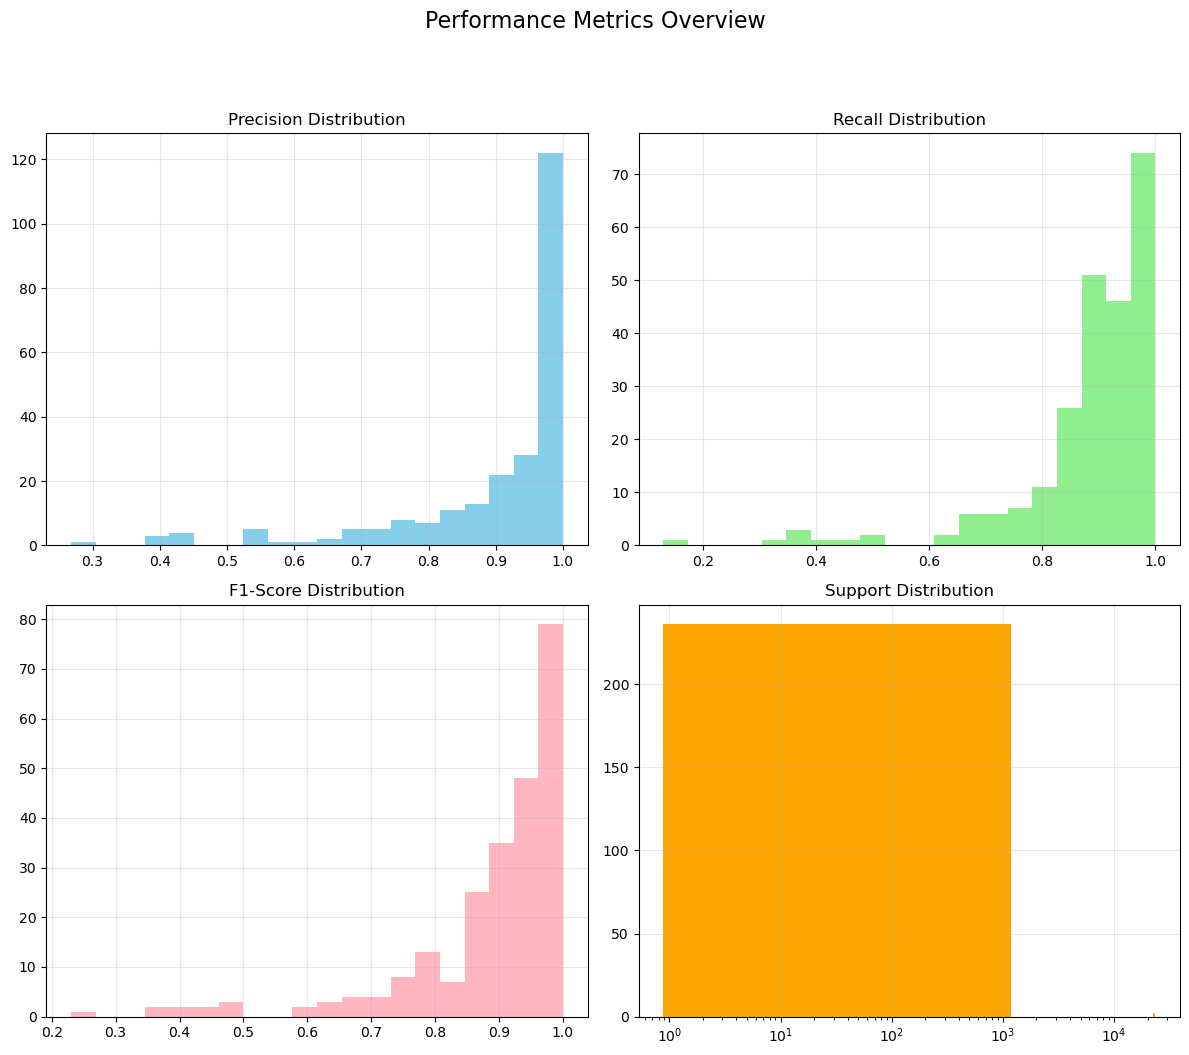

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Performance Metrics Overview', fontsize=16, y=1.05)

axes[0,0].hist(df_metrics['precision'], bins=20, color='skyblue')
axes[0,0].set_title('Precision Distribution')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(df_metrics['recall'], bins=20, color='lightgreen')
axes[0,1].set_title('Recall Distribution')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(df_metrics['f1-score'], bins=20, color='lightpink')
axes[1,0].set_title('F1-Score Distribution')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(df_metrics['support'], bins=20, color='orange')
axes[1,1].set_title('Support Distribution')
axes[1,1].set_xscale('log')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
